<a href="https://colab.research.google.com/github/dmitriygorlov/Yandex.Practikum_Data_Science/blob/main/Module-final-Common-project/project_final_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект для Telecom компании «Ниединогоразрыва.ком»

Необходимо обучить модель, предсказывающую отток клиентов для формирования предложений по скидкам и промокодам.

## Описание услуг



Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

## Описание данных



 /datasets/final_provider/

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

В каждом файле есть столбец CustomerId - который является связующим

Данные предоставлены на 1 Февраля 2020 года.

# План работ

- Подготовка Данных и Исследовательский анализ данных
  - Предварительное изучение данных
  - Получение итоговой таблицы
  - Исследование распределений по целевому признаку и Кластеризация
  - Подготовка train и test
- Настройка и подбор лучших моделей
  - Обучение и подбор гиперпараметров разных моделей
- Тест и вывод
  - Итоговый тест на выделенных лучших моделях по AUC-ROC и Accuracy
  - Вывод по выбранной для использования модели и комментарии про исходные данные

# Подготовка Данных и Исследовательский анализ данных

## Загрузка библиотек и файлов

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

from lightgbm import LGBMClassifier

!pip install catboost
from catboost import CatBoostClassifier

from sklearn.dummy import DummyClassifier

rand_stat = 42

     |████████████████████████████████| 675 kB 14.5 MB/s 
     |████████████████████████████████| 28.5 MB 42 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 76.4 MB 23 kB/s 


Библиотеки загрузили

https://drive.google.com/file/d/15r2FielktOMWN-KQN8w8owu96_nRtiUN/view?usp=sharing 

In [2]:
! gdown --id 15r2FielktOMWN-KQN8w8owu96_nRtiUN

Downloading...
From: https://drive.google.com/uc?id=15r2FielktOMWN-KQN8w8owu96_nRtiUN
To: /content/final_provider.zip
100% 294k/294k [00:00<00:00, 79.4MB/s]


In [3]:
!unzip "/content/final_provider.zip" -d "/content/final_provider/"

Archive:  /content/final_provider.zip
   creating: /content/final_provider/final_provider/
  inflating: /content/final_provider/final_provider/personal.csv  
  inflating: /content/final_provider/__MACOSX/final_provider/._personal.csv  
  inflating: /content/final_provider/final_provider/contract.csv  
  inflating: /content/final_provider/final_provider/phone.csv  
  inflating: /content/final_provider/__MACOSX/final_provider/._phone.csv  
  inflating: /content/final_provider/final_provider/internet.csv  


In [4]:
contract = pd.read_csv('/content/final_provider/final_provider/contract.csv')
personal = pd.read_csv('/content/final_provider/final_provider/personal.csv')
internet = pd.read_csv('/content/final_provider/final_provider/internet.csv')
phone = pd.read_csv('/content/final_provider/final_provider/phone.csv')

In [5]:
# contract = pd.read_csv('/datasets/final_provider/contract.csv')
# internet = pd.read_csv('/datasets/final_provider/internet.csv')
# personal = pd.read_csv('/datasets/final_provider/personal.csv')
# phone = pd.read_csv('/datasets/final_provider/phone.csv')

Файлы загрузили, изучим предварительно данные. 

## Предварительное Изучение исходных данных

### Contract

Начнём с главной таблицы - Информация о договорах

In [6]:
def check_df(df):
  display(df.info())
  display(df.head())
  print()
  print('Количество уникальных customerID:', df['customerID'].nunique())

In [7]:
check_df(contract)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



Количество уникальных customerID: 7043


В нашей таблице 7043 клиента, пропуски отсутствуют. На первый взгляд: необходимо пройтись по типам данных у столбцов; проанализировать распределения в столбцах; а также создать целевой столбец для машинного обучения. Начнём с типов данных

Для начала разберёмся с датами. Кажется даты фиксируют только статус на первое число каждого месяца, проверим.

In [8]:
print('Какие Дни есть в BeginDate:', '\n', contract['BeginDate'].str[-2:].value_counts(), '\n')
print('Какие Дни есть в EndDate:', '\n', contract['EndDate'].str[-11:].value_counts(), '\n')

Какие Дни есть в BeginDate: 
 01    7043
Name: BeginDate, dtype: int64 

Какие Дни есть в EndDate: 
 No             5174
01 00:00:00    1869
Name: EndDate, dtype: int64 



Действительно есть только дни, поменяем тип данных на datetime

In [9]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format = '%Y-%m-%d', errors='coerce')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format = '%Y-%m-%d', errors='coerce')
# print(contract.info())

Даты поменяли на нужный тип, вызывает подозрение и столбец TotalCharges, проверим почему он не числовой

In [10]:
# Посмотрим что не смогло бы сконвертить
display(contract[pd.to_numeric(contract['TotalCharges'], errors='coerce').isnull()])

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,


Кажется причиной неточностей являются клиенты Февраля 2020 года ввиду их первого месяца использования (сумма по ним посчитается в следующем месяце). Проверим

In [11]:
display(contract[contract['BeginDate'] == '2020-02-01'])

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,


Количество клиентов сошлось, гипотеза верна. Учитывая нашу задачу, уберём клиентов текущего месяца, поскольку мы еще не знаем ничего об их расторжении контракта. Теперь смело поменяем тип и уберём нули

In [12]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract.dropna(subset = ['TotalCharges'], inplace = True)

# contract.info()

Теперь пройдёмся по каждому из столбцов и изучим его.

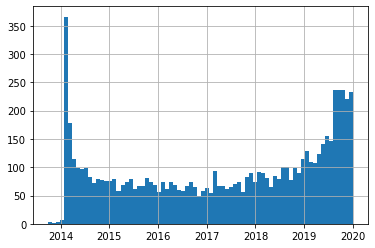

Главный пик начала контрактов: 
 2014-02-01    0.052048
Name: BeginDate, dtype: float64


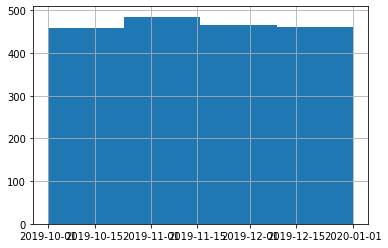

Распределение окончания договоров: 
 NaT           0.734215
2019-11-01    0.068970
2019-12-01    0.066268
2020-01-01    0.065415
2019-10-01    0.065131
Name: EndDate, dtype: float64


In [13]:
def hist_with_bins(column):
  column.hist(bins = len(column.value_counts()))
  plt.show()  

hist_with_bins(contract['BeginDate'])
print('Главный пик начала контрактов:', '\n' , contract['BeginDate'].value_counts(normalize = True).head(1))

hist_with_bins(contract['EndDate'])
print('Распределение окончания договоров:', '\n', contract['EndDate'].value_counts(dropna = False, normalize = True))

Много клиентов датируется 6 лет назад - февралём 2014 (5% от всей базу) и также последние месяца 2019 года, в остальное время примерно одинаковое количество клиентов. 

А вот конец контрактов только в последние 4 месяца - либо странность либо особенность базы. **Обязательно учесть факт только 4 месяцев расторжения при выводе**

Кроме того важно, что 73% от базы все ещё являюся клиентами, в базе явный перекос в пользу информации о действующих клиентах.

Теперь изучим клиентов, которые окончили взаимодействие с нами

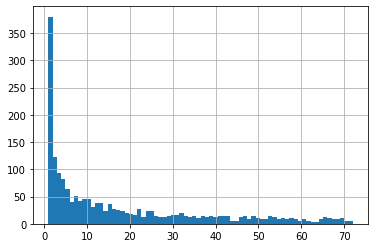

(0, 1]       0.203317
(1, 5]       0.194757
(5, 12]      0.156768
(12, 100]    0.445158
Name: duration_M, dtype: float64

In [14]:
contract_end = contract[contract['EndDate'].notna()].copy()

contract_end['duration_M'] = (((contract_end['EndDate'] - contract_end['BeginDate']) / np.timedelta64(1, 'M')).round()).astype(int)

hist_with_bins(contract_end['duration_M'])

pd.cut(contract_end['duration_M'], bins = [0, 1, 5, 12, 100]).value_counts(normalize = True).sort_index()

У распределения времени пользования услугами компании очень длинный хвост с большим максимумом на 1 месяце. **Каждый пятый клиент отказался от услуг компании через месяц использования, еще 20% были пользователями 5 и менее месяцев, 44% пользовались более года.**

По условию у нас также есть клиенты с годовым и двухгодовым типом оплаты, посмотрим отличаются ли они в длительности пользования услугами.

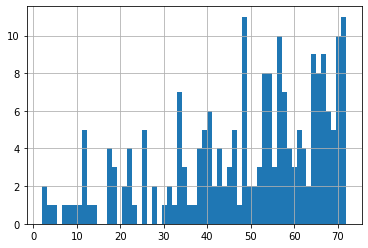

In [15]:
hist_with_bins(contract_end[contract_end['Type'].isin(['Two year', 'One year'])]['duration_M'])

Странно, но люди оплачивающие на год и 2 не прекращают использование кратно 12 месяцам. Возможно вина в переездах, переключении на других провайдеров, но важно понимать, что здесь нет корреляции с 12 месяцами!

Посмотрим на другие столбцы

In [16]:
def check_cat_column(column):
  print('Кратко о', column.name)
  print(column.value_counts(normalize = True), '\n')

In [17]:
# contract.columns
check_cat_column(contract['Type'])
check_cat_column(contract['PaperlessBilling'])
check_cat_column(contract['PaymentMethod'])

# проверка вхождения типов друг в друга не дала нужных данных
# contract.groupby(['PaperlessBilling', 'PaymentMethod']).count()['customerID']

Кратко о Type
Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: Type, dtype: float64 

Кратко о PaperlessBilling
Yes    0.592719
No     0.407281
Name: PaperlessBilling, dtype: float64 

Кратко о PaymentMethod
Electronic check             0.336320
Mailed check                 0.228100
Bank transfer (automatic)    0.219283
Credit card (automatic)      0.216297
Name: PaymentMethod, dtype: float64 



Примерно половина клиентов (55%) оплачивает услуги ежемесячно, а другие на год или два. 

60% пользователей использует безбумажный чек.

Среди клиентов распределены разные методы оплат: треть использует электронный чек и по 22% (приблизительно) используют чек по почте, банковский перевод и кредитную карту.

Посмотрим на столбцы оплат

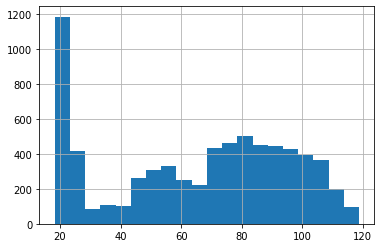

In [18]:
bins = int((contract['MonthlyCharges'].max() - contract['MonthlyCharges'].min())//5)
contract['MonthlyCharges'].hist(bins = bins)

Клиенты платят по разному в месяц - заметен пик у минимального значения - 20, а также пик около 80/

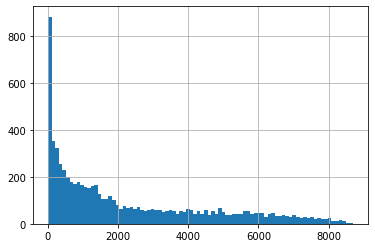

In [19]:
bins = int((contract['TotalCharges'].max() - contract['TotalCharges'].min())//100)
contract['TotalCharges'].hist(bins = bins)

Среди наших клиентов есть как те, кто принёс нам уже очень много денег (длинный хвост вплоть до 9000), так и те, кто принёс около минимума. 

Посмотрим подробнее

98


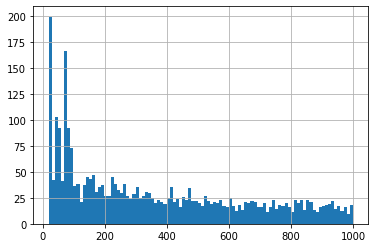

In [20]:
bins = int((contract[contract['TotalCharges'] < 1000]['TotalCharges'].max() - contract[contract['TotalCharges'] < 1000]['TotalCharges'].min())//10)


print(bins)
contract[contract['TotalCharges'] < 1000]['TotalCharges'].hist(bins = bins)

Видно несколько пиков до 100 как около минимума 20, так и около 70.

Прежде, чем добавлять значения других таблиц в contract и создания целевых переменных, посмотрим на данные внутри них

### Personal

In [21]:
check_df(personal)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Количество уникальных customerID: 7043


В таблице, описывающей клиентов, строк столько же сколько и в главной. Пропусков нет, столбцы в основном текстовые. Признаки сдержат краткое описание атрибутов клиента.

Рассмотрим подробнее

In [22]:
for col in personal.columns.drop('customerID'):
  check_cat_column(personal[col])

Кратко о gender
Male      0.504756
Female    0.495244
Name: gender, dtype: float64 

Кратко о SeniorCitizen
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64 

Кратко о Partner
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64 

Кратко о Dependents
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64 



В нашей базе^ 
- половина мужчин и женщин, 
- 16% пожилых, 
- у половины есть партнеры,
- у 30% есть иждивенцы

### Internet

In [23]:
check_df(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Количество уникальных customerID: 5517


В Интернетов пользуются не все клиенты (таблица с этими данными короче главной и составляет 5517 объектов).  Пропусков нет, все столбцы текстовые. Признаки содержат атрибуты использования интернет сервисов.

Посмотрим подробнее

In [24]:
for col in internet.columns.drop('customerID'):
  check_cat_column(internet[col])

Кратко о InternetService
Fiber optic    0.561175
DSL            0.438825
Name: InternetService, dtype: float64 

Кратко о OnlineSecurity
No     0.63404
Yes    0.36596
Name: OnlineSecurity, dtype: float64 

Кратко о OnlineBackup
No     0.559724
Yes    0.440276
Name: OnlineBackup, dtype: float64 

Кратко о DeviceProtection
No     0.560993
Yes    0.439007
Name: DeviceProtection, dtype: float64 

Кратко о TechSupport
No     0.629509
Yes    0.370491
Name: TechSupport, dtype: float64 

Кратко о StreamingTV
No     0.509335
Yes    0.490665
Name: StreamingTV, dtype: float64 

Кратко о StreamingMovies
No     0.504803
Yes    0.495197
Name: StreamingMovies, dtype: float64 



Среди пользователей интернет услуг 56% подключены через кабель, оставшиеся 44% через телефонную связь DSL. Только 37% пользуются услугами Онлайн безопасности, 37% Тех поддержкой, 44% Онлайн поддержкой и 44% Защитой устройств. Почти половина пользуется Стриминговым телевидением и каталогом фильмов

### Phone

In [25]:
check_df(phone)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



Количество уникальных customerID: 6361


елефонными услугами также пользуются не все пользоваели (только 6361). Пустых значений нет, дополнительная информация указана по услуге Многоканальность.

Посмотрим на распределение.

In [26]:
check_cat_column(phone['MultipleLines'])

Кратко о MultipleLines
No     0.532935
Yes    0.467065
Name: MultipleLines, dtype: float64 



Примерно половина (47%) использует Многоканальности

Перейдём к созданию общей таблицы

## Получение итоговой таблицы (merge, OHE, выделение target)

Прежде чем добавлять новые столбцы и подготовить данные получим общую таблицу с помощью merge

In [27]:
df = pd.merge(contract, personal, on = 'customerID')

df = pd.merge(df, internet, on = 'customerID', how = 'left')
df = pd.merge(df, phone, on = 'customerID', how = 'left')

# df.info()
# df.head()

Также добавим итоговое состояние клиента (активен он на данный момент или нет)

In [28]:
df['finished'] = np.where(df['EndDate'].isna(), 0, 1)
# display(df.head())

После создания общей таблицы (из-за того, что не все клиенты пользуются услугами телефонии и интернета) появилось много столбцов с пустыми значениями, разберёмся с ними.

Первым возьмём EndDate. Сам признак, как и BeginDate нам не нужны, однако нам нужна продолжительность жизни клиента с нами. Заполним пустое значение датой представления отчёта (1 февраля 2020) и посчитаем длительность для всех клиентов. Ненужные столбцы сразу выбросим.

In [29]:
df['EndDate'].fillna(pd.Timestamp('2020-02-01'), inplace = True)

# df['duration_M'] = (((df['EndDate'] - df['BeginDate']) / np.timedelta64(1, 'M')).round()).astype(int)

df['duration_M'] = (df['EndDate'] - df['BeginDate']).astype(int)


df.drop(['BeginDate', 'EndDate'], axis = 1, inplace = True)

По большей части пропуски в столбцах с бинарными вариантами Да/нет и мы можем заменить отсутствие значения нулём. Но есть столбец "InternetService", где логика поставить "нет" не применима, а также столбец "MultipleLines", где поставив "нет" - мы потеряем разницу между использующими телефонные услуги в целом и не использующие. Создадим для этого доп признаки.

In [30]:
df['HaveInternet'] = np.where(df['InternetService'].isna(), 0, 1)
df['HavePhone'] = np.where(df['MultipleLines'].isna(), 0, 1)
# df.head()

Теперь заполним пропуски в признаках Да/нет. Пропуск в InternetService заполним далее при помощи get_dummies

In [31]:
YesNoNA = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in YesNoNA:
  df[col].fillna('No', inplace = True)

# df.info()

Итак, для окончания подготовки данных нам осталось разобраться с категорийными переменными, оставшимися пропусками в InternetService, а также оптимизировать признаки Yes/No. Воспользуемся для этого get_dummies

In [32]:
df = pd.get_dummies(df, columns = ['Type', 'PaperlessBilling', 'PaymentMethod',
       'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'], 
       drop_first = True)

# df.info()

Напоследок удалим последний лишний столбец, не несущий полезной информации для дальнейшего анализа - это customerID

In [33]:
df.drop('customerID', axis =1, inplace = True)
# df.info()

Теперь наши данные готовы, перейдём к анализу Целевого признака и попробуем найти закономерности с помощью кластеризации

In [34]:
df

,MonthlyCharges,TotalCharges,SeniorCitizen,finished,duration_M,HaveInternet,HavePhone,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
0,29.85,29.85,0,0,2678400000000000,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,89510400000000000,1,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0
2,53.85,108.15,0,1,5270400000000000,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,118454400000000000,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
4,70.70,151.65,0,1,5270400000000000,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,84.80,1990.50,0,0,63072000000000000,1,1,1,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1
7028,103.20,7362.90,0,0,189302400000000000,1,1,1,0,1,1,0,0,0,1,1,1,0,1,1,0,1,1,1
7029,29.60,346.45,0,0,29116800000000000,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0
7030,74.40,306.60,1,1,10627200000000000,1,1,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,1


## Исследование целевого признака и Кластеризации

In [35]:
df['finished'].value_counts(normalize = True).round(2)

0    0.73
1    0.27
Name: finished, dtype: float64

Только 27% исходной таблицы составляют ушедшие клиенты, а это значит, что мы имеем дело с несбалансированной бинарной классификацией. Посмотрим есть ли какие-то визуально выделяющиеся зависимости. Для начала получим списки бинарных и числовых столбцов

In [36]:
num_col = []
bin_col = []

for col in df.columns.drop('finished'):
  if len(df[col].value_counts()) < 3:
    bin_col.append(df[col].name)
  else:
    num_col.append(df[col].name)

Теперь с помощью группировок посмотрим на различие в бинарных столбцах

In [37]:
for col in bin_col:
  display(df.groupby(col)['finished'].agg(['mean', 'count']))

,mean,count
SeniorCitizen,,
0,0.236503,5890
1,0.416813,1142


,mean,count
HaveInternet,,
0,0.074342,1520
1,0.318578,5512


,mean,count
HavePhone,,
0,0.250000,680
1,0.267475,6352


,mean,count
Type_One year,,
0,0.306295,5560
1,0.112772,1472


,mean,count
Type_Two year,,
0,0.340565,5347
1,0.028487,1685


,mean,count
PaperlessBilling_Yes,,
0,0.163757,2864
1,0.335893,4168


,mean,count
PaymentMethod_Credit card (automatic),,
0,0.297042,5511
1,0.152531,1521


,mean,count
PaymentMethod_Electronic check,,
0,0.170988,4667
1,0.452854,2365


,mean,count
PaymentMethod_Mailed check,,
0,0.287583,5428
1,0.192020,1604


,mean,count
gender_Male,,
0,0.269595,3483
1,0.262046,3549


,mean,count
Partner_Yes,,
0,0.329761,3639
1,0.197171,3393


,mean,count
Dependents_Yes,,
0,0.312791,4933
1,0.155312,2099


,mean,count
InternetService_Fiber optic,,
0,0.145325,3936
1,0.418928,3096


,mean,count
OnlineSecurity_Yes,,
0,0.313733,5017
1,0.146402,2015


,mean,count
OnlineBackup_Yes,,
0,0.292164,4607
1,0.215670,2425


,mean,count
DeviceProtection_Yes,,
0,0.286953,4614
1,0.225393,2418


,mean,count
TechSupport_Yes,,
0,0.312300,4992
1,0.151961,2040


,mean,count
StreamingTV_Yes,,
0,0.243705,4329
1,0.301147,2703


,mean,count
StreamingMovies_Yes,,
0,0.244362,4301
1,0.299524,2731


,mean,count
MultipleLines_Yes,,
0,0.250677,4065
1,0.286485,2967


Исходя из полученных данных, мы можем сказать, что доля отказавшихся пользователей выше среди:
- Пользователей старшего возраста
- Пользователей интернет услуг
- Пользователей с помесячной оплатой
- Пользователей, использующих безбумажный чек
- Пользователей, оплачивающих через электронный чек
- Пользователей без партнера
- Пользователей, подключенных через оптоволоконный кабель
- Пользователей стримингового телевидения и каталога фильмов
- Пользователей не использующих остальные доп. интернет услоуги (онлайн безопасность, бэкапы, защитой устройств, тех поддержкой)

А вот не влияет на расторжение договора признаки:
- Пользуется ли услугой телефонии
- Пол
- Использование многоканальной телефонии

Теперь также взглянем на числовые переменные, а заодно и проверим корреляцию среди них

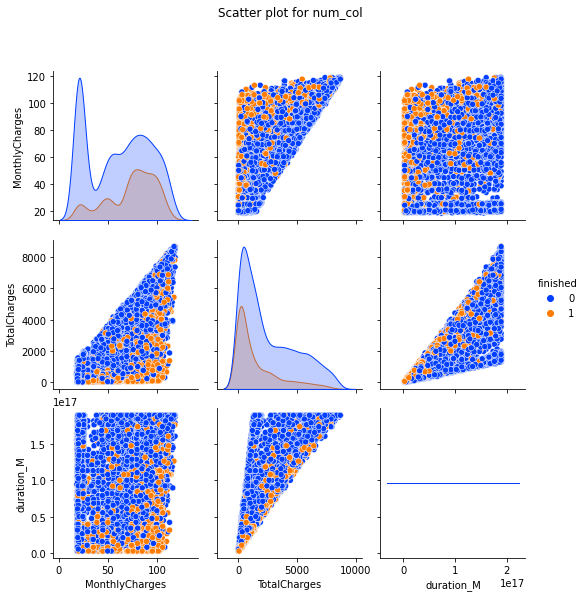

In [38]:
cor = num_col + ['finished']

pair_df = df[cor].copy()

map_corr = sns.pairplot(pair_df, hue='finished', palette = 'bright')
map_corr.fig.suptitle('Scatter plot for num_col', y = 1.1)
plt.show()

По графику мы можем заметить:
- Есть большая часть пользователей, кто платит мало за месяц, но при этом они меньше отказываются от наших услуг
- Особой зависимости среди уплаченно в течении всего времени клиента и ухода - нет
- Время очень сильно влияет на то останется с нами человек или нет - среди недавно подключившихся процент прерывания почи 50%, а вот среди долгих клиентов он уходит почти в ноль.

Кроме того заметно как эти три показателя связаны между собой (чем выше месячная плата - тем выше сумма, а также чем дольше человек с нами - тем выше месячная плата), что конечно же логично. Однако это может привести к проблеме Мультиколлениарности. Проверим с помощью phik


In [39]:
phik = pair_df.phik_matrix()
phik.round(2)

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'duration_M', 'finished']


,MonthlyCharges,TotalCharges,duration_M,finished
MonthlyCharges,1.00,0.76,0.40,0.36
TotalCharges,0.76,1.00,0.84,0.28
duration_M,0.40,0.84,1.00,0.42
finished,0.36,0.28,0.42,1.00


Как и предполагалось, у столбцов duration_M показатель к TotalCharges выше порога в 0.9, поэтому мы уберём этот столбец (при этом полнота данных сохранится)

Попробуем выделить кластеры в наших финансовых показателях. Для начала подберёмя количество кластеров с помощью метода локтя

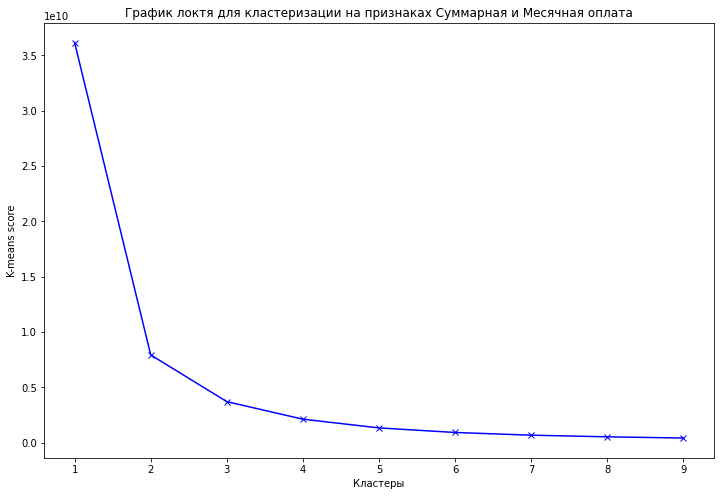

In [40]:
k_df = df[['MonthlyCharges', 'TotalCharges']].copy()

distortion = []
K = range(1, 10)

for k in K:
    Kmodel = KMeans(n_clusters = k, random_state = rand_stat)
    Kmodel.fit(k_df)
    distortion.append(Kmodel.inertia_) 

plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.title('График локтя для кластеризации на признаках Суммарная и Месячная оплата')
plt.xlabel('Кластеры')
plt.ylabel('K-means score')
plt.show() 

Исходя из графика выберем 3 кластера, посмотрим как выглядит это разделение

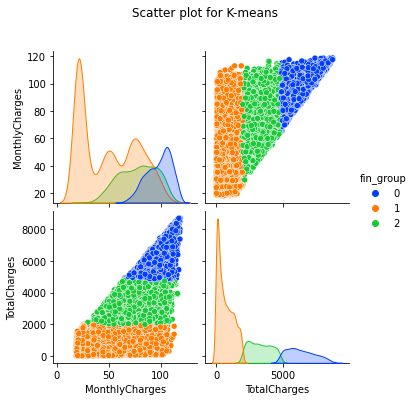

1    4166
2    1611
0    1255
Name: fin_group, dtype: int64

In [41]:
Kmodel = KMeans(n_clusters = 3, random_state = rand_stat)
Kmodel.fit(k_df)

k_df['fin_group'] = Kmodel.labels_
map_K = sns.pairplot(k_df, hue='fin_group', palette = 'bright')
map_K.fig.suptitle('Scatter plot for K-means', y = 1.1)
plt.show()

k_df['fin_group'].value_counts()

Как мы видим получились интересный кластеры, делящие наш сет на 3 чётких денежных сегмента, схожий с RFM аналитикой. Единственное - для машинного обучения и лучшей читаемости будет изменить наименования групп от наименне экономически выгодной до наиболее (где 0 - это группа с наименьшими оплатами). Добавим этот столбец в нашу большую таблицу

In [42]:
df.columns

Index(['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'finished',
       'duration_M', 'HaveInternet', 'HavePhone', 'Type_One year',
       'Type_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'MultipleLines_Yes'],
      dtype='object')

In [43]:
df['fin_group'] = Kmodel.labels_

df['fin_group'] = df['fin_group'].map({1:0, 2:1, 0:2})

display(df.groupby(['fin_group'])['finished'].agg(['mean', 'count']))

,mean,count
fin_group,,
0,0.320931,4166
1,0.222843,1611
2,0.137849,1255


Выявленные кластеры показывают сильную зависимость с целевым признаком: у сегмента 0 выше процент прекративших сотрудничество (почти треть), у 1 сегмента меньше и самое малое у 2 сегмента (только 14%)

Данные подготовлены, теперь разбобъём наши данные для использования в машинном обучении

## Подготовка обучающей и тестовой выборок

Вначале поделим на обучаюие и целевой признаки, а также выделим тестовую часть для финальной проверки модели

In [44]:
features = df.drop(['finished', 'TotalCharges'], axis = 1)
target = df['finished']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = rand_stat, stratify = target)

Учитывая, что у нас есть числовые значения разных разбросов - нормализуем их

In [45]:
num_col = ['MonthlyCharges', 'duration_M']

scaler = StandardScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

Теперь данные готовы, приступим к моделям

In [46]:
features

,MonthlyCharges,SeniorCitizen,duration_M,HaveInternet,HavePhone,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,fin_group
0,29.85,0,2678400000000000,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
1,56.95,0,89510400000000000,1,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0
2,53.85,0,5270400000000000,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0
3,42.30,0,118454400000000000,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0
4,70.70,0,5270400000000000,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,84.80,0,63072000000000000,1,1,1,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,1
7028,103.20,0,189302400000000000,1,1,1,0,1,1,0,0,0,1,1,1,0,1,1,0,1,1,1,2
7029,29.60,0,29116800000000000,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0
7030,74.40,1,10627200000000000,1,1,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0


# Настройка и подбор лучших моделей машинного обучения

Запишем функцию для подбора лучшей модели

In [47]:
def grid(name, model, params):
  clf = GridSearchCV(estimator = model, param_grid = params, cv = 5, scoring = 'roc_auc', n_jobs = -1)
  clf.fit(X_train, y_train)
  print('Parametrs of best Model', clf.best_estimator_)
  res = pd.DataFrame({'ROC-AUC_train': round(clf.best_score_, 4)}, index = [name])
  display(res)
  return clf.best_estimator_

## Random Forest

Возьмём модель случайного леса с выбранным балансированием классов и пройдёмся перебором разных параметров для получения наилучшей модели.

In [48]:
name_rf = 'RandomForestClassifier'
model_rf = RandomForestClassifier(class_weight = 'balanced', random_state = rand_stat)
params_rf = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100],
    'min_samples_split' : [4, 8, 16],
    'min_samples_leaf' : [2, 6, 10]
}

In [49]:
best_rf = grid(name_rf, model_rf, params_rf)

Parametrs of best Model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


,ROC-AUC_train
RandomForestClassifier,0.8562


## Logistic Regression

Для регресси не так много параметров, но попробуем тоже обучить несколько параметров

In [50]:
name_lr = 'LogisticRegression'
model_lr = LogisticRegression(class_weight = 'balanced', random_state = rand_stat)
params_lr = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}

In [51]:
best_lr = grid(name_lr, model_lr, params_lr)

Parametrs of best Model LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


,ROC-AUC_train
LogisticRegression,0.8461


## SGD Classifier

Попробуем модель с Стохастическим градиентным спуском

In [52]:
name_sgd = 'SGDClassifier'
model_sgd = SGDClassifier(class_weight = 'balanced', random_state = rand_stat)
params_sgd = {
    'fit_intercept': [True, False],
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge','perceptron'],
    'alpha': [0.000001,0.00001,0.00005,0.0001,0.0005,0.001]
}

In [53]:
best_sgd = grid(name_sgd, model_sgd, params_sgd)

Parametrs of best Model SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=False,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)


,ROC-AUC_train
SGDClassifier,0.8449


## LGBM Classifier

Попробуем модель градиентным бустингом

In [54]:
name_lgbm = 'LGBMClassifier'
model_lgbm = LGBMClassifier(class_weight = 'balanced', random_state = rand_stat)
params_lgbm = {
    'n_estimators' : [100, 300, 500, 1000],
    'depth' : [30, 15, 10, 5],
    'learning_rate' : [0.1, 0.01, 0.001]
}

In [55]:
best_lgbm = grid(name_lgbm, model_lgbm, params_lgbm)

Parametrs of best Model LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, depth=30, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=300,
               n_jobs=-1, num_leaves=31, objective=None, random_state=42,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


,ROC-AUC_train
LGBMClassifier,0.8949


## CatBoost Classifier

Попробуем модель градиентным бустингом

In [56]:
name_cat = 'CatBoostClassifier'
model_cat = CatBoostClassifier(auto_class_weights = 'Balanced', random_seed = rand_stat, verbose=1000)
params_cat = {
    # 'n_estimators':[100], 
    'learning_rate':[0.0001, 0.001, 0.01],
    'depth' : [7]
}

In [57]:
best_cat = grid(name_cat, model_cat, params_cat)

0:	learn: 0.6885678	total: 51.2ms	remaining: 51.1s
999:	learn: 0.3339807	total: 3.75s	remaining: 0us
Parametrs of best Model <catboost.core.CatBoostClassifier object at 0x7f9c13ac5810>


,ROC-AUC_train
CatBoostClassifier,0.8732


Из моделей очень сильно выделилась LGBM с почти 0,9 Roc_AUC score. Посмотрим, как модели поведут себя на тесте.

# Тест моделей

Для удобства напишем функцию для подсчёта итогов и вывода

In [58]:
result = pd.DataFrame(columns=['Name of model', 'ROC-AUC_train', 'ROC-AUC_test', 'Accuracy_test'])

def test_sum(model, name):
  predict_pro_test = model.predict_proba(X_train)[:, 1]
  predict_pro = model.predict_proba(X_test)[:, 1]
  pred = model.predict(X_test)

  fpr, tpr, thresholds = roc_curve(y_test, predict_pro) 

  plt.figure(figsize=(10, 10))
  plt.plot(fpr, tpr, linestyle='-')
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-curve')
  plt.show()
  auc = round(roc_auc_score(y_test, predict_pro), 4)
  acc = round(accuracy_score(y_test, pred), 4)
  train = round(roc_auc_score(y_train, predict_pro_test), 4)

  print("ROC-AUC:", auc)
  print('Accuracy:', acc)
  model_res = {'Name of model': name, 'ROC-AUC_train': train, 'ROC-AUC_test': auc, 'Accuracy_test': acc}
  return model_res

## Random Forest

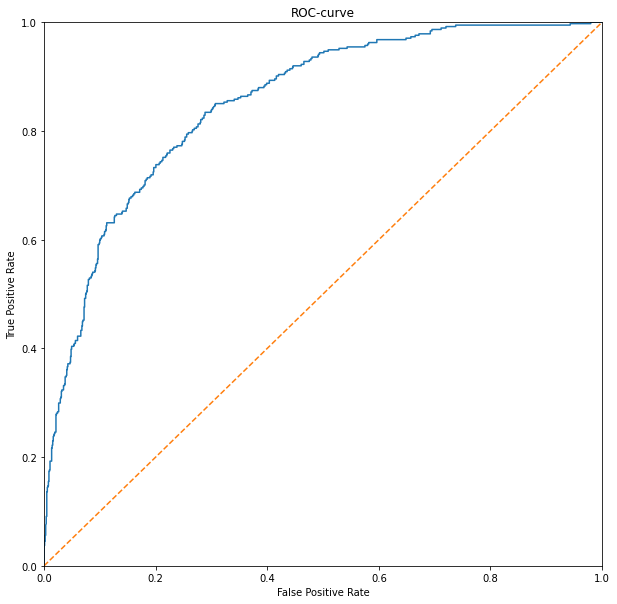

ROC-AUC: 0.8517
Accuracy: 0.7683


In [59]:
result = result.append(test_sum(best_rf, name_rf), ignore_index=True)

## Logistic Regression

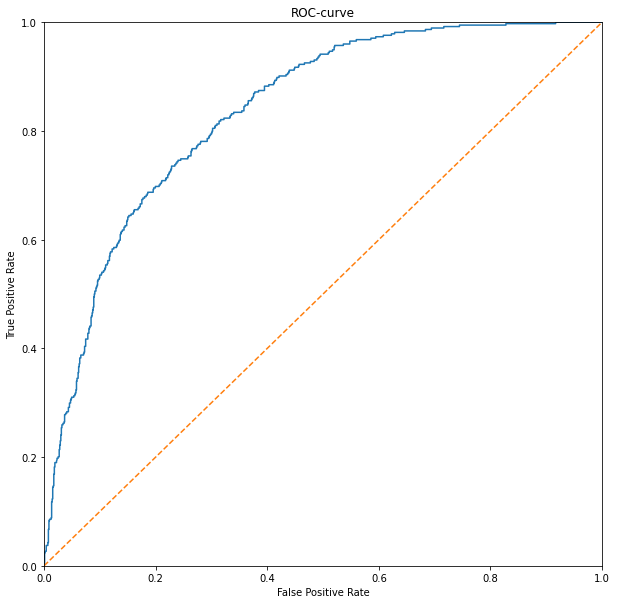

ROC-AUC: 0.8359
Accuracy: 0.7278


In [60]:
result = result.append(test_sum(best_lr, name_lr), ignore_index=True)

## SGD Classifier

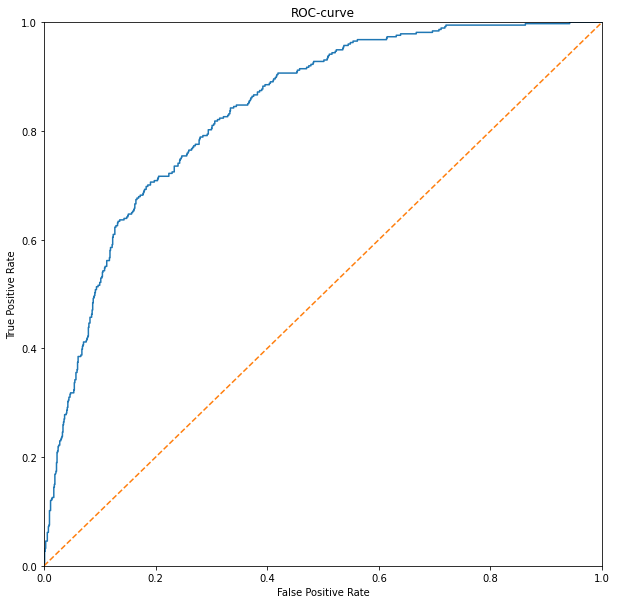

ROC-AUC: 0.8374
Accuracy: 0.7477


In [61]:
result = result.append(test_sum(best_sgd, name_sgd), ignore_index=True)

## LGBM Classifier

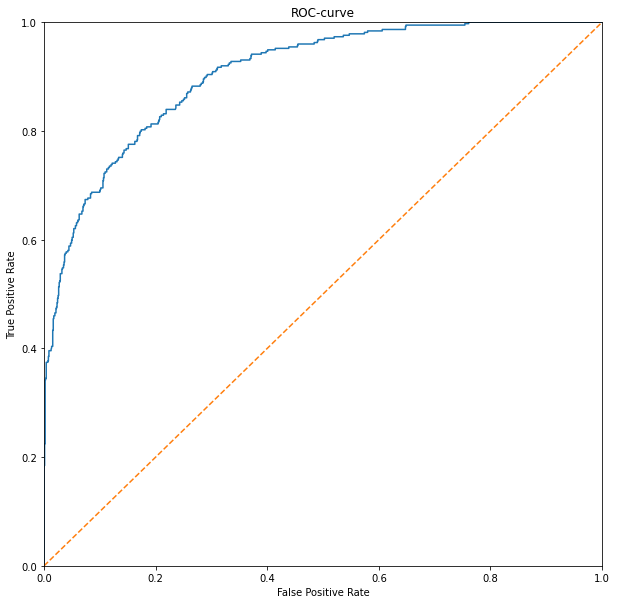

ROC-AUC: 0.9047
Accuracy: 0.8358


In [62]:
result = result.append(test_sum(best_lgbm, name_lgbm), ignore_index=True)

## CatBoost Classifier

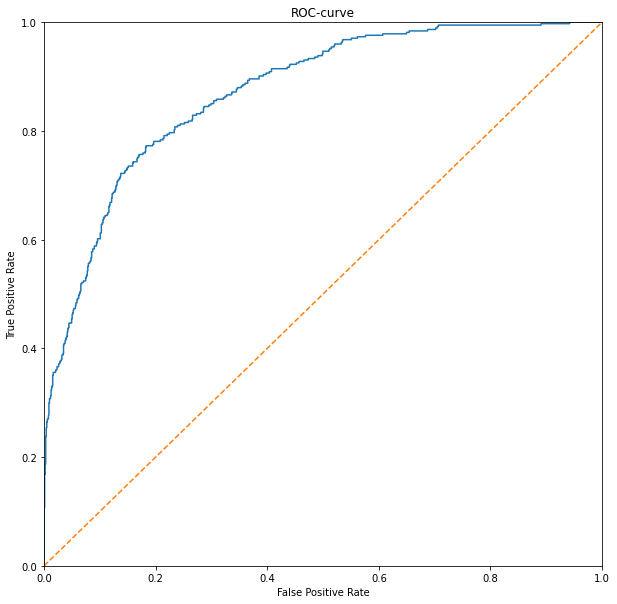

ROC-AUC: 0.8716
Accuracy: 0.7783


In [63]:
result = result.append(test_sum(best_cat, name_cat), ignore_index=True)

## Sanity check

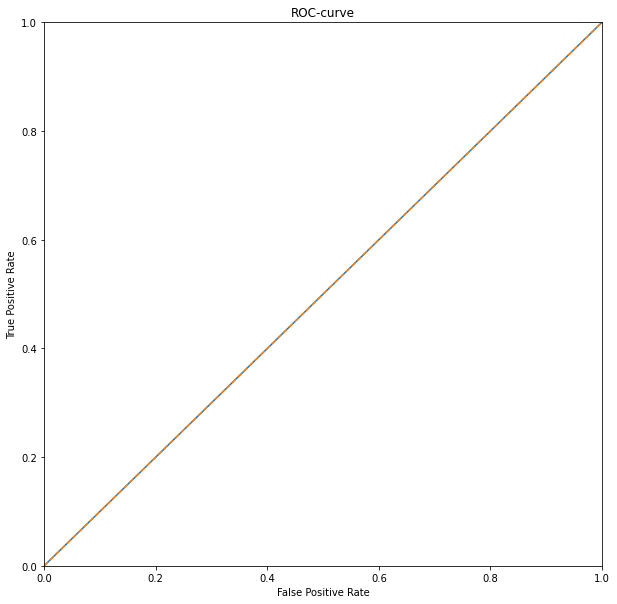

ROC-AUC: 0.4998
Accuracy: 0.6091


In [64]:
dum = DummyClassifier(strategy='stratified')

dum.fit(X_train, y_train)
name_dum = 'DummyClassifier'

result = result.append(test_sum(dum, name_dum), ignore_index=True)

## Итоги

In [65]:
print(result.sort_values(by = 'ROC-AUC_test', ascending=False))

            Name of model  ROC-AUC_train  ROC-AUC_test  Accuracy_test
3          LGBMClassifier         0.9970        0.9047         0.8358
4      CatBoostClassifier         0.9390        0.8716         0.7783
0  RandomForestClassifier         0.9204        0.8517         0.7683
2           SGDClassifier         0.8497        0.8374         0.7477
1      LogisticRegression         0.8508        0.8359         0.7278
5         DummyClassifier         0.4990        0.4998         0.6091


По результатам теста лучше всего справилась модель LGBMClassifier (на тестовой выборке ROC-AUC score составил **КОСМИЧЕСКИЕ** 0,9047, её и будем использовать в работе! Accuracy у модели тоже с отрывом лучше от конкурентов: 0,8358!

Теперь взглянем на важность параметров у нашей модели - победителя

## Важность параметров (feature importance)

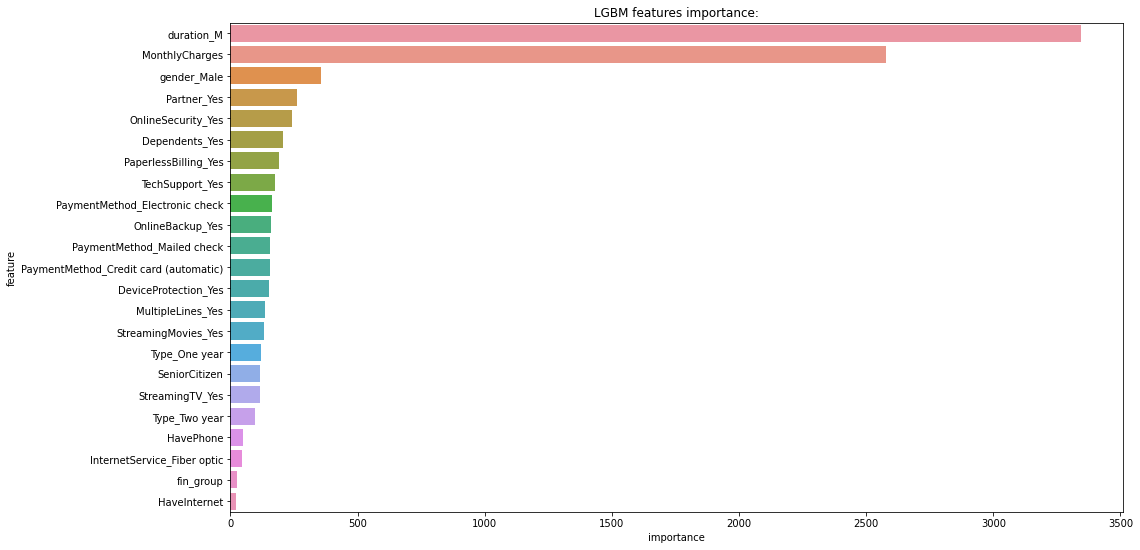

In [66]:
feature_importance = (pd.DataFrame({'feature': list(X_train.columns), 
                    'importance': best_lgbm.feature_importances_})
.sort_values(by='importance', ascending=False))
plt.figure(figsize=(16, 9));
sns.barplot(x="importance", y="feature", data = feature_importance);
plt.title('LGBM features importance:');
plt.show()

Как видно из графика с больших отрывом наиболее значимыми стали признаки сколько времени клиент с нами и его величина месячной оплаты. Важно, что эти значения были в изначальной таблице (то есть дополнительная информация даже была не так важна для модели).

Наименее важными же факторами оказались:
- Наличие или отсутствие телефонных услуг
- Проложен интернет через оптоволоконный кабель или нет
- Сегменты клиентов по финансовым группам (добавлено нами через кластеризацию)
- Наличие или отсутствие интернет услуг

Таким образом, можно предположить, что наши удержательные механики стоит настроить основным образом на временной и финансовый параметр.

# Вывод

Главный вывод: **Мы обучили модель LGBMClassifier для нашего случая несбалансированной бинарной классификации, которая показала хороший результат на тестовой выборке в 0.9047 AUC-ROC и 0.8358 Accuracy**

Важные комментарии:
- Наиболее важные метрики, по которым стоит следить за клиентами и относить их в "группу риска" - это продолжительность сотрудничества и величина оплаты в месяц
- Лучше всего справились модели с градиентным бустингом, однако по всем моделям заметна небольшая переобученность, однако подбором гипермараметров не удалось решить эту проблему
- Модель преодолела sanity check
- По исходным данным видно, что все клиенты закончили сотрудничество в последние 4 месяца. Возможно это предоставленные данные, возможно есть какая-то проблема, которая произошла в последнее время, что привела к оттоку!
- 20% клиентов уходит после первого месяца - необходимо продумать стратегию удержания после первого периода
- Много клиентов уходит из пользователей интернета - возможно стоит делать промокоды и акции с расчётом на интернет услуги